In [36]:
import requests #Importa la libreria request
import matplotlib.pyplot as plt #Importa la libreria matplotlib.pyplot y la renombra como plt
import numpy as np #Importa la libreria numpy y la renombra como np

In [37]:
class Pais: # Define una clase llamada Pais
    def __init__(self): # Define un constructor para la clase Pais
      # Define tres atributos de la clase Pais: nombre, codigo y capital
      self.nombre = ""
      self.codigo = ""
      self.capital = ""

    def cargarDatos(self, respuesta): #Se define el método cargar datos
      self.nombre = respuesta[1][0]['name'] #Extrae el nombre del pais
      self.codigo = respuesta[1][0]['id'] #Extrae el código (Ej. "USA")
      self.capital = respuesta[1][0]['capitalCity'] #Extrae la capital

class Indicador: #Define la clase Indicador
    def __init__(self, nombre, codigo, descripcion): #Define un constructor para la clase Pais
      # Define tres atributos de la clase Indicador: nombre, codigo y descripcion
        self.nombre = nombre
        self.codigo = codigo
        self.descripcion = descripcion


class Indicadores: #Define la clase Indicadores
    #Define un constructor para la clase Indicadores
    def __init__(self):
      self.indicadores = [] #Lista vacia a la que despues se le iran agregando cosas

    def cargarDatos(self, respuesta): # Se define un método llamado Cargar datos
      for i in range(len(respuesta[1])): # Recorre uno por uno todos los elementos que hay dentro de respesuta[1]
        indicado = Indicador(respuesta[1][i]['name'], respuesta[1][i]['id'],respuesta[1][i]['sourceNote']) # Toma el registro número i y crea un objeto Indicador usando tres campos
        self.indicadores.append(indicado) # Guarda el objeto indicador dentro de la lista self.indicadores


class API: # Crea la clase API
    def __init__(self, link): # Se define el constructor
      self.link = link # Se guarda el valor link dentro de otro objeto que se llama igual

    def obtenerPeticion(self):  # Se define un método llamado obtener petición
        respuesta = requests.get(self.link) # Se hace una petición para obtener los datos a la URL anteriormente guardada
        data = respuesta.json() # Convierte el contenido de la respuesta a formato JSON, con el fin de que Python los entienda mejor
        return data # Devuelve los datos

In [48]:
def menu(): # Define una función llamada menu
  paises = [("Colombia","COL"),("Estados Unidos","USA"), ("Argentina", "ARG"),("Brazil", "BRA"), ("Chile","CHL"), ("Uruguay", "URY")] # Crea una lista con dos tuplas, cada una tiene nombre del pais y codigo00
  print("¡Bienvenido al sistema de visualizacion economica!") # Muestra el mensaje
  print("Elija un pais de entre las opciones: ") # Muestra el mensaje
  i = 1 # Empieza desde 1
  for nombre,codigo in paises: # Se recorre una lista llamada paises en donde cada elemento es un par
      print(f"{i}. {nombre}") # Imprime una linea con el numero actual y el nombre del pais
      i += 1 # Sumar 1 al contador

  print("") # Imprime un espacio
  opcion = int(input()) # Convierte lo que escribe el usuario a un numero entero
  i = 1 # Empieza desde 1
  for nombre,codigo in paises: # Se recorre una lista llamada paises en donde cada elemento es un par
    if i == opcion: # Compara el numero del contador con la que opcion que eligio el usuario
      return codigo # Devuelve el codigo
    i += 1 # Si no coincide aumenta el contador en 1 y continua al siguiente pais

In [49]:
def indicadores(indicadores): # Define una función llamada indicadores
  print("Elija la cantidad de indicadores que quiera mostrar ej. 10   MAX = 300") # Muestra un mensaje
  cantidad = int(input()) # Convierte lo que escribe el usuario a un número entero
  if cantidad > len(indicadores): # En caso de que el número sea mayor al máximo el programa tomará el valor más grande
    cantidad = len(indicadores)
  for i in range(cantidad): # Crea la secuencia
    print(f"{i+1}. {indicadores[i].nombre}") # Imprime un texto numerado que parte del 1 y toma el objeto i de la lista indicadores y lee sunombre

  print("Elija el numero de la estadistica que quiere graficar: ") # Muestra un mensaje
  opcion = int(input()) # Convierte lo que se escribe a número entero
  for i in range(cantidad): # Recorres las posiciones
    if i == opcion-1: # Compara la posición con el número que se eligió menos 1
      return indicadores[i] # Si coincide, devuelve el elemento de la lista indicadores en esa posición

¡Bienvenido al sistema de visualizacion economica!
Elija un pais de entre las opciones: 
1. Colombia
2. Estados Unidos
3. Argentina
4. Brazil
5. Chile
6. Uruguay

6
Elija la cantidad de indicadores que quiera mostrar ej. 10   MAX = 300
10
1. Annualized Mean Income Growth (2004-2014)
2. Annualized Mean Income Growth Bottom 40 Percent (2004-2014)
3. Annualized Mean Income Growth (2004-2009)
4. Annualized Mean Income Growth Bottom 40 Percent (2004-2009)
5. Annualized Mean Income Growth (2009-2014)
6. Annualized Mean Income Growth Bottom 40 Percent (2009-2014)
7. Consumption per capita (2011 $)
8. GDP (current $)
9. GDP growth (annual %)
10. GDP (constant 2005 $)
Elija el numero de la estadistica que quiere graficar: 
8
[{'indicator': {'id': '6.0.GDP_current', 'value': 'GDP (current $)'}, 'country': {'id': 'URY', 'value': 'Uruguay'}, 'countryiso3code': '', 'date': '2014', 'value': 57471030095.3708, 'unit': '', 'obs_status': '', 'decimal': 0}, {'indicator': {'id': '6.0.GDP_current', 'value'

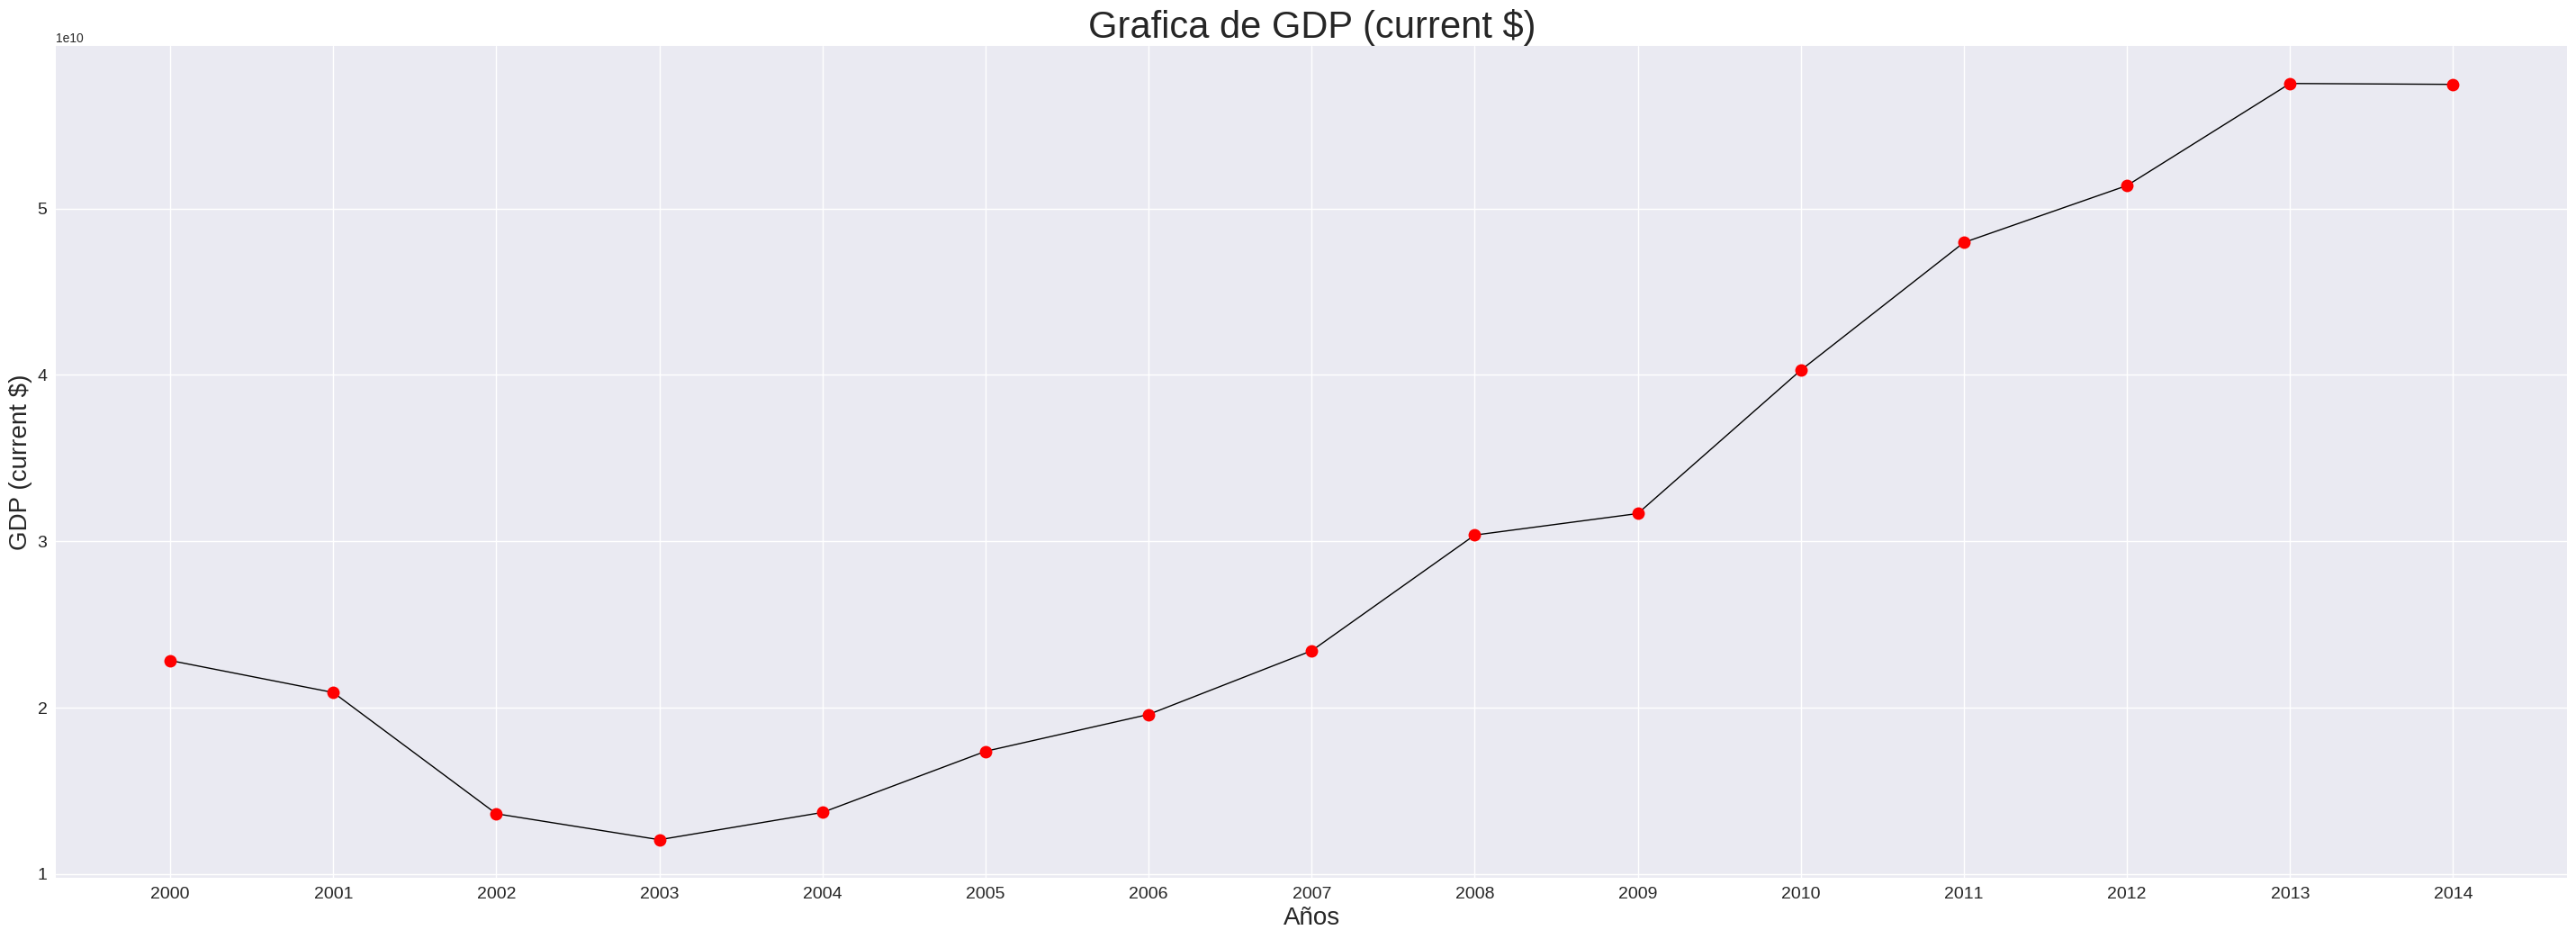

In [50]:
cod = menu() # le pide al usuario que es escoja un pais, devuelve la cadena con el codigo de pais de BM
link = f"https://api.worldbank.org/v2/country/{cod}?format=json" # Construye la URL para consultar la informacion del pais que se escogio antes
apiPais = API(link) #Crea un objeto API guardando la URL (link) anterior
pais = Pais() # instancia un contenedor vacio para los campos de pais (Nombre, Codigo,Capital)
pais.cargarDatos(apiPais.obtenerPeticion()) # Hace GET a link, convierte a JSON y devuelve la estructura
listaIndicadores = Indicadores() #Crea un contenedor para almacenar muchos indicadores
apiIndicadores = API("https://api.worldbank.org/v2/topic/3/indicator?format=json&per_page=300") #Prepara una llamada al catalogo de inicadores del Topico 3
listaIndicadores.cargarDatos(apiIndicadores.obtenerPeticion()) #Obtiene el JSON con indicadores, recorre respuesta 1 y para cada fila crea un indicador y lo agrega a self.indicators
indicadorFinal = indicadores(listaIndicadores.indicadores) #LLama la funcion de menu de indicadores, imprime los nombres y luego pide el numero de la estadistica a graficar, devuelve el objeto indicador elegido
apiDatos = API(f"https://api.worldbank.org/v2/country/{cod}/indicator/{indicadorFinal.codigo}?format=json") #Prepara la URL para pedir la serie temporal del indicador elegido para el pais elegido
datos = apiDatos.obtenerPeticion() #Realiza el GET a esa URL y retorna el JSON con la serie
años = () #Crea tuplas vacias para años
valores = () #crea tuplas vacias para valores
if datos[1] == None:
  print("No hay datos disponibles")
else:
  print(datos[1])
  for i in range(len(datos[1])):
    años += (datos[1][i]['date'],)
    valores += (datos[1][i]['value'],)
  print(años)
  print(valores)
#Recorre cada observacion en datos 1, extrae el año, el valor y los añade a sus tuplas correspodientes y imprime las tuplas antes de transformarlas. Tienen un orden descendente
  años = list(años)
  años.reverse()
  valores = list(valores)
  valores.reverse()
#Convierte las tuplas a listas, invierte su orden para tenerlo de menor a mayor
  plt.style.use('seaborn-v0_8') #Estilo Visual
  fig, ax = plt.subplots(figsize=(36, 12)) #crea figura y ejes. Define el tamaño del grafico
  ax.plot(años, valores, linewidth = 1, color = 'black', marker='o', markersize=10, markerfacecolor='red', markeredgecolor='black') #Define el color de la linea, la anchura, el marker para cada año y su color
  ax.set_title(f'Grafica de {indicadorFinal.nombre}', fontsize = 30) #Escribe el titulo del grafico
  ax.set_xlabel('Años', fontsize = 20) #Etiqueta eje x
  ax.set_ylabel(indicadorFinal.nombre, fontsize = 20) #Etiqueta eje y
  ax.tick_params(axis = 'both', labelsize = 14) #Tamaño de los ticks
  ax.axis()
  plt.show()